# 第二周 機器學習資料分析與視覺化

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.manifold import TSNE

### 此堂課中，我們會使用下列網址的資料集
https://www.kaggle.com/code/parulpandey/penguin-dataset-the-new-iris/data

In [2]:
pg_path = os.path.join('.', 'Datasets','Penguin Dataset', 'penguins_lter.csv')
pg_df = pd.read_csv(pg_path)

In [3]:
pg_df.head(5)

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,11/16/07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN


In [4]:
pg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   studyName            344 non-null    object 
 1   Sample Number        344 non-null    int64  
 2   Species              344 non-null    object 
 3   Region               344 non-null    object 
 4   Island               344 non-null    object 
 5   Stage                344 non-null    object 
 6   Individual ID        344 non-null    object 
 7   Clutch Completion    344 non-null    object 
 8   Date Egg             344 non-null    object 
 9   Culmen Length (mm)   342 non-null    float64
 10  Culmen Depth (mm)    342 non-null    float64
 11  Flipper Length (mm)  342 non-null    float64
 12  Body Mass (g)        342 non-null    float64
 13  Sex                  334 non-null    object 
 14  Delta 15 N (o/oo)    330 non-null    float64
 15  Delta 13 C (o/oo)    331 non-null    flo

### 因同時考慮類別及連續變數較複雜，這裡只考慮連續變數

In [5]:
cont_col = ['Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)','Delta 15 N (o/oo)', 'Delta 13 C (o/oo)']

## 有些連續變數變相的資料含有缺失值，先刪除

In [6]:
pg_df.dropna(axis=0, subset=cont_col, inplace=True)

In [7]:
pg_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 330 entries, 1 to 343
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   studyName            330 non-null    object 
 1   Sample Number        330 non-null    int64  
 2   Species              330 non-null    object 
 3   Region               330 non-null    object 
 4   Island               330 non-null    object 
 5   Stage                330 non-null    object 
 6   Individual ID        330 non-null    object 
 7   Clutch Completion    330 non-null    object 
 8   Date Egg             330 non-null    object 
 9   Culmen Length (mm)   330 non-null    float64
 10  Culmen Depth (mm)    330 non-null    float64
 11  Flipper Length (mm)  330 non-null    float64
 12  Body Mass (g)        330 non-null    float64
 13  Sex                  325 non-null    object 
 14  Delta 15 N (o/oo)    330 non-null    float64
 15  Delta 13 C (o/oo)    330 non-null    flo

### 進行聚類分析前，我們須先將資料做正規化

In [8]:
# 對連續變數做預處理
scaler = StandardScaler()
pg_cont = scaler.fit_transform(pg_df[cont_col])
pg_cont_df = pd.DataFrame(pg_cont, columns=cont_col)

In [9]:
pg_cont_df

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo)
0,-0.836108,0.149089,-1.098327,-0.517252,0.392385,1.267428
1,-0.689012,0.452790,-0.452764,-1.201393,-0.662823,0.456176
2,-1.350945,1.110807,-0.596222,-0.952614,0.060131,0.467307
3,-0.872882,1.768824,-0.811410,-0.703836,-0.124192,0.500609
4,-0.946430,0.351556,-1.456974,-0.734933,0.823690,0.602333
...,...,...,...,...,...,...
325,0.579693,-1.723729,0.910092,0.882127,-1.345973,-0.652243
326,0.506145,-1.420029,0.981821,0.788835,-0.584229,-0.567036
327,1.168078,-0.711395,1.483926,1.908338,-0.783618,-0.443598
328,0.211952,-1.166945,0.766634,1.224197,-0.891072,-0.543365


## 以散點圖方式觀察群聚性

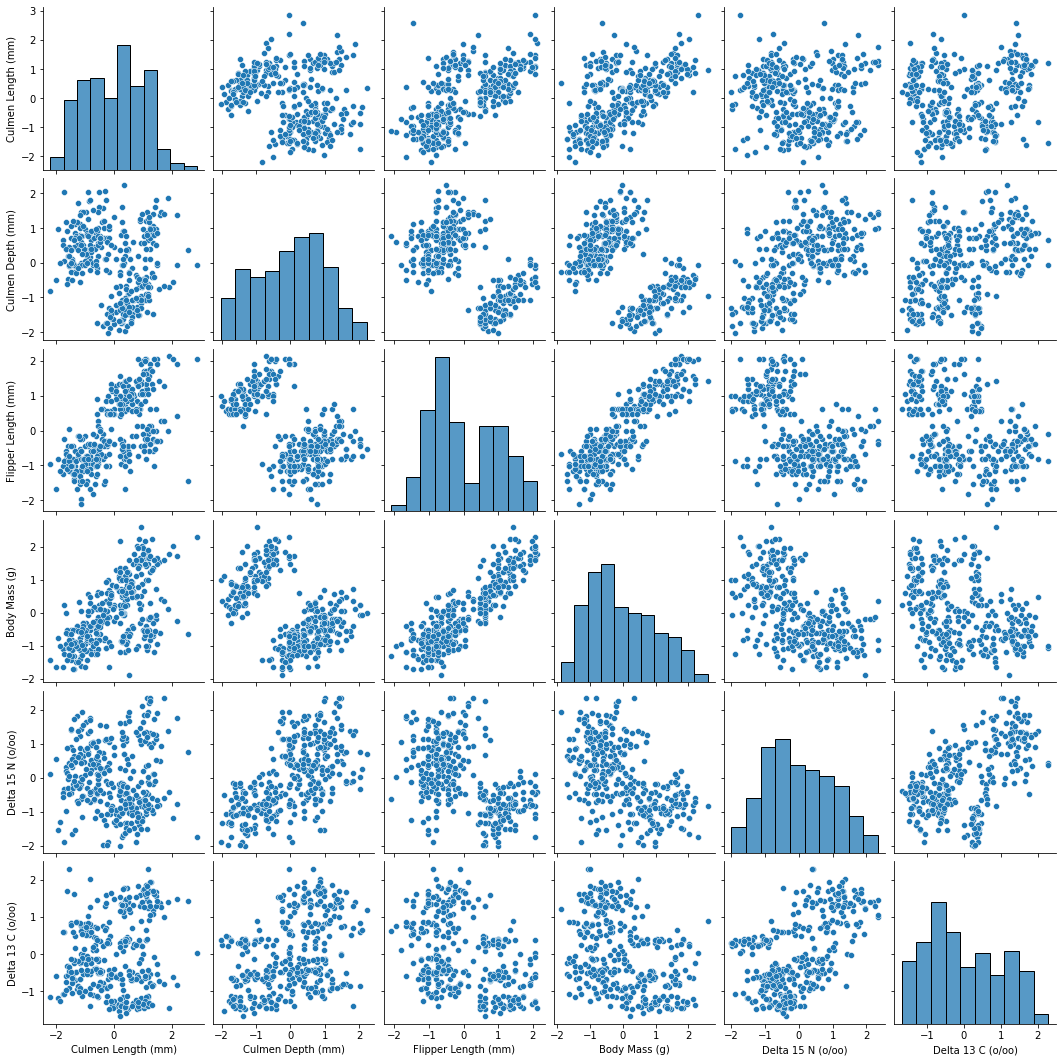

In [10]:
sns.pairplot(pg_cont_df)

## Clustering (聚集)

聚類是根據一些預定義變數的相似性或相異性（例如歐幾里得距離）將樣本收集成相似樣本組的任務。

以下是聚類算法的一些常見應用：

- 壓縮，在減少數據維度
- 可用作推薦系統的預處理步驟
- 相似地：
    - 對相關的網路新聞（例如 Google 新聞）和網路搜索結果進行分組
    - 為投資組合管理分組相關的股票報價
    - 建立客戶檔案以進行市場分析
- 為無監督的特徵提取建立一個新的代碼書



### K-means分群

#### 初始化演算法

In [11]:
kmean = KMeans(n_clusters=3, random_state=0)

#### 使用演算法決定類別

In [12]:
label_kmeans = kmean.fit_predict(pg_cont_df)

#### 查看各預測類別結果

In [13]:
for i in range(min(set(label_kmeans)),max(set(label_kmeans))+1):
    print("label_kmeans為",i,"的比數有:", len(label_kmeans[label_kmeans == i]))

label_kmeans為 0 的比數有: 133
label_kmeans為 1 的比數有: 122
label_kmeans為 2 的比數有: 75


In [14]:
pg_cont_df_2 = pg_cont_df.copy()
pg_cont_df_2["k_target"] = label_kmeans

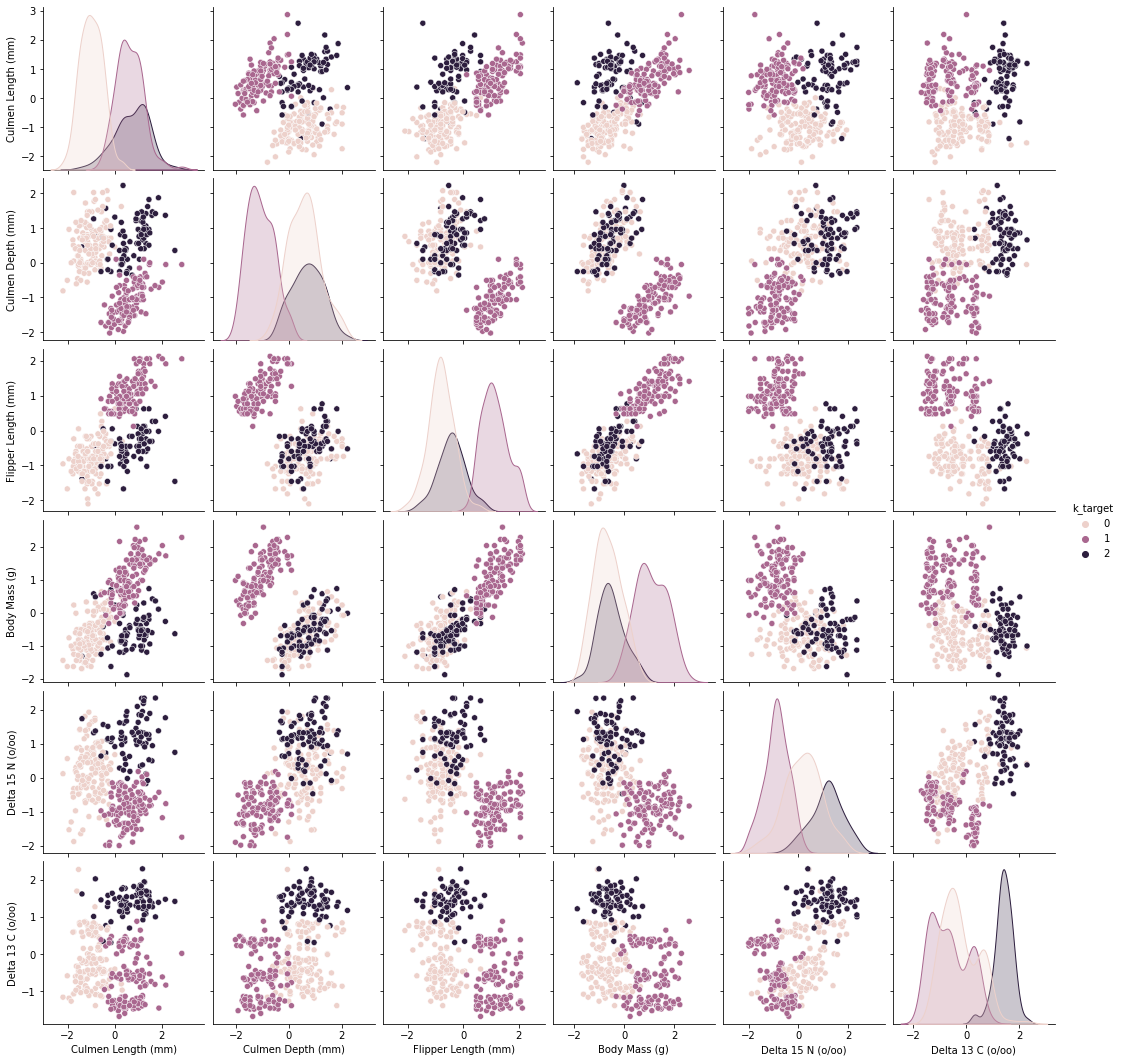

In [15]:
sns.pairplot(pg_cont_df_2, hue="k_target")
plt.show()

#### 輪廓係數（Silhouette Coefficient）

是聚類效果好壞的一種評價方式。最早由 Peter J. Rousseeuw 在 1986 提出。它結合內聚度和分離度兩種因素。可以用來在相同原始數據的基礎上用來評價不同算法、或者算法不同運行方式對聚類結果所產生的影響。值介於-1到1之間，越接近1代表越好。

#### 參數設定

In [16]:
range_n_clusters = [2, 3, 4, 5]

#### 執行演算法

In [17]:
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=2022)
    cluster_labels = clusterer.fit_predict(pg_cont_df)

    silhouette_avg = silhouette_score(pg_cont_df, cluster_labels)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

For n_clusters = 2 The average silhouette_score is : 0.4630228929849744
For n_clusters = 3 The average silhouette_score is : 0.4395661410047768
For n_clusters = 4 The average silhouette_score is : 0.3386127127035206
For n_clusters = 5 The average silhouette_score is : 0.27391083826692175


#### 藉由silhouette score，可以得到此資料集分成2群或3群最為適當

### DBSCAN

在DBSCAN的實作中，有兩個主要的參數，分別為eps與min_sample。

eps代表著圓的半徑，min_samples代表著以核心點為圓心的圓裡面所需包含的最小樣本數。

若eps愈小，min_sample愈大，則代表著我們對樣本密度的要求較高。反之，若取eps大，min_sample卻很小，代表著我們對樣本密度的要求較低。

而這些參數的大小，應綜合考量樣本本身以及我們自身的需求而給定。

#### 初始化演算法

In [18]:
dbscan = DBSCAN(eps=1, min_samples=10)

#### 使用演算法決定類別

In [19]:
label_dbscan = dbscan.fit_predict(pg_cont_df)

In [20]:
pg_cont_df_3 = pg_cont_df.copy()
pg_cont_df_3["db_target"] = label_dbscan

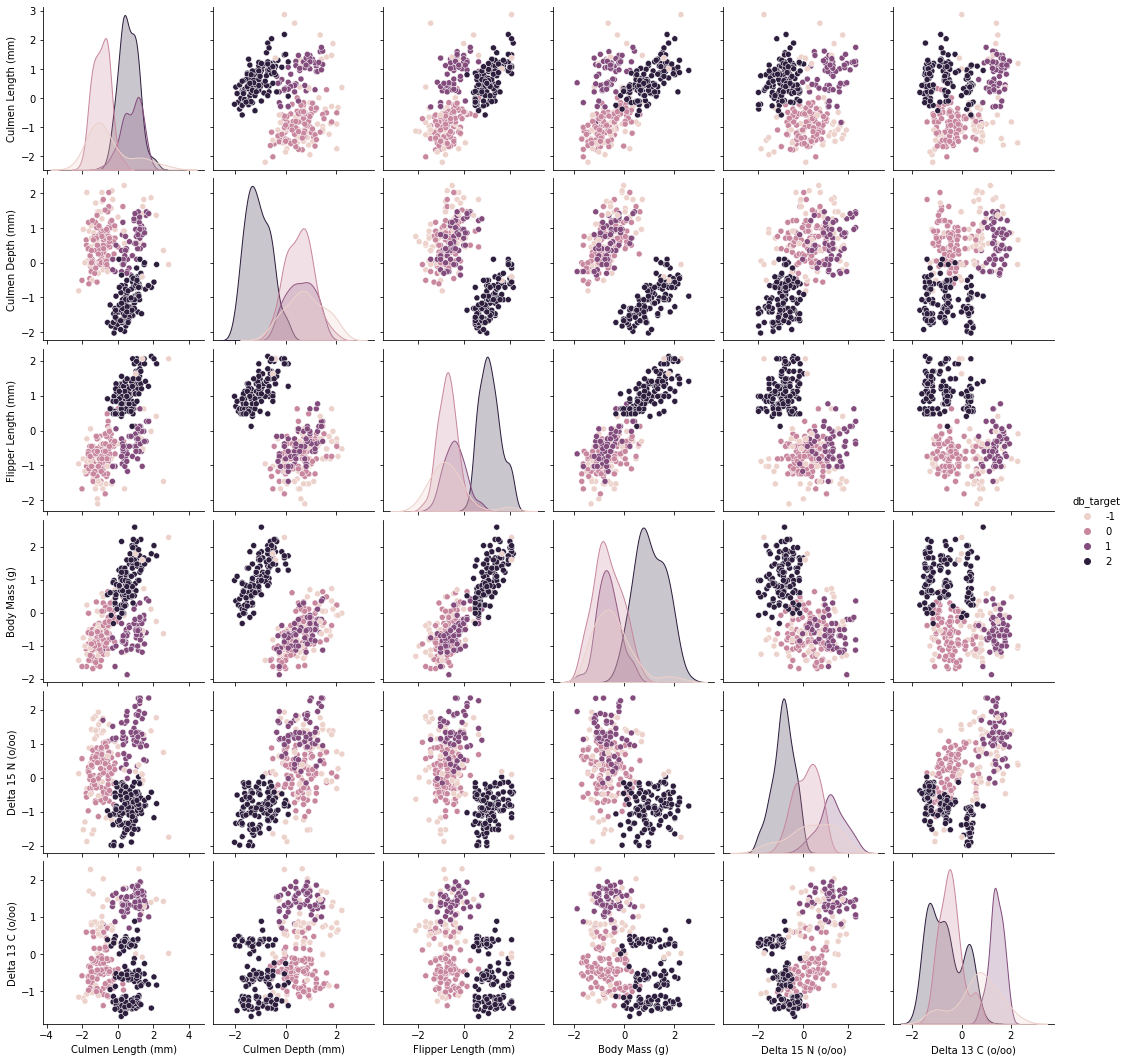

In [21]:
sns.pairplot(pg_cont_df_3, hue="db_target")

#### 試著找最佳參數

In [22]:
range_eps = [1, 3, 5]
range_min_samples = [5, 10, 15]

In [23]:
for eps in range_eps:
    for min_samples in range_min_samples:
        clusterer = DBSCAN(eps=eps, min_samples=min_samples)
        cluster_labels = clusterer.fit_predict(pg_cont_df)
        # 加入判斷式以防都歸為同類時出錯
        if len(np.unique(cluster_labels)) > 1:
            silhouette_avg = silhouette_score(pg_cont_df, cluster_labels)
            print("For eps =", eps, "and min_samples = ", min_samples, "The average silhouette_score is :", silhouette_avg)

For eps = 1 and min_samples =  5 The average silhouette_score is : 0.32249625919319125
For eps = 1 and min_samples =  10 The average silhouette_score is : 0.338011582174598
For eps = 1 and min_samples =  15 The average silhouette_score is : 0.27731316558307006


## 降維

### 主成分分析(Principal Component Analysis)

一個更有趣的無監督式學習為主成分分析。 它是一種通過建立線性投影來降低數據維度的技術。也就是說，我們找到新的特徵來表示舊數據的線性組合。

PCA找到這些新特徵的方法是尋找最大方差的方向。 通常只保留解釋數據中大部分方差的少數變數。

#### 設定參數

In [24]:
pca = PCA(n_components=2) # 降為二維

#### 執行降維

In [25]:
pg_pca = pca.fit_transform(pg_cont_df)
pg_pca #看一下資料型態

array([[-1.65633636, -0.0297052 ],
       [-1.06374686, -0.70748777],
       [-1.77382765, -0.72928481],
       [-1.82878676, -0.33648227],
       [-2.02562336, -0.39482075],
       [-1.57608484,  0.70566131],
       [-1.66960899,  0.56152438],
       [-1.54527737, -0.96586951],
       [-1.38884234, -0.56573724],
       [-1.94617523, -0.02320806],
       [-0.98685581,  0.50488028],
       [-1.92935243, -1.39748837],
       [-1.72881015,  1.43451633],
       [-2.29042577, -0.86259193],
       [-1.99892969, -0.72029905],
       [-2.18068462, -0.30294745],
       [-1.22363281, -0.81564357],
       [-2.14026629, -0.18921529],
       [-2.48054801,  0.02811052],
       [-1.83485409, -0.36633707],
       [-1.07355902, -1.13683943],
       [-2.26659208, -1.22650417],
       [-1.83712065, -0.15030269],
       [-2.51950278, -0.15350957],
       [-2.60242977, -0.04368027],
       [-2.35511032,  0.13685211],
       [-1.61383792, -0.14124506],
       [-1.65793518, -0.64333718],
       [-1.88680797,

In [26]:
pg_pca_df = pd.DataFrame(pg_pca, columns = ["PCA_1", "PCA_2"])

#### 視覺化

c:\Users\gopl0\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


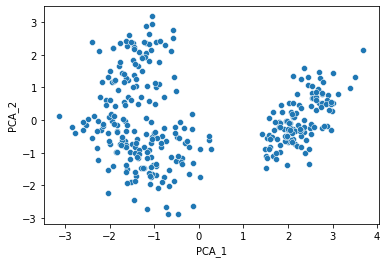

In [27]:
sns.scatterplot(pg_pca_df["PCA_1"], pg_pca_df["PCA_2"])
plt.xlabel("PCA_1")
plt.ylabel("PCA_2")
plt.show()

### 用上帝視角看一下

c:\Users\gopl0\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


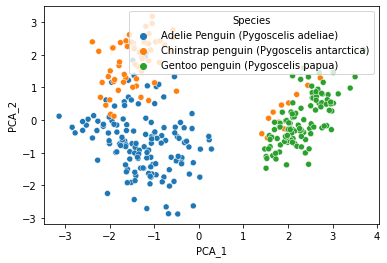

In [28]:
sns.scatterplot(pg_pca_df["PCA_1"], pg_pca_df["PCA_2"], hue=pg_df['Species'])
plt.xlabel("PCA_1")
plt.ylabel("PCA_2")
plt.show()

### t-SNE
是一種非線性的機器學習降維方法，有很強的捕捉局部特徵的能力
但解釋 t-SNE 的映射時要特別注意
- 比較兩堆的大小沒有意義
- 比較兩堆間的距離沒有意義
- t-SNE 不能用於尋找離群點
- 不適用於新資料

#### 初始化演算法

In [29]:
tsne = TSNE(n_components=2, init='random', random_state = 2022)

#### 執行降維

In [30]:
pg_tsne = tsne.fit_transform(pg_cont_df)
pg_tsne_df = pd.DataFrame(pg_tsne, columns = ["tsne_1", "tsne_2"])

c:\Users\gopl0\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


#### 視覺化

c:\Users\gopl0\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


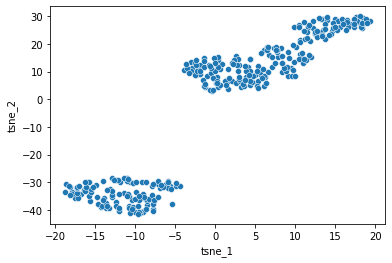

In [31]:
sns.scatterplot(pg_tsne_df["tsne_1"], pg_tsne_df["tsne_2"])
plt.xlabel("tsne_1")
plt.ylabel("tsne_2")
plt.show()

### 用上帝視角看一下

c:\Users\gopl0\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


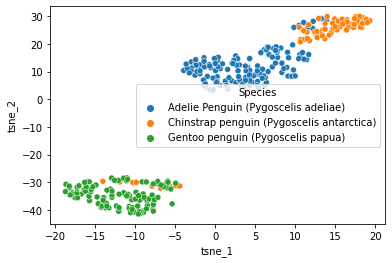

In [32]:
sns.scatterplot(pg_tsne_df["tsne_1"], pg_tsne_df["tsne_2"], hue=pg_df['Species'])
plt.xlabel("tsne_1")
plt.ylabel("tsne_2")
plt.show()

### 試試不同參數

In [33]:
range_perplexity = [5, 50, 500]
range_learning_rate = [10, 100, 1000]

For perplexity = 5 and learning_rate =  10


c:\Users\gopl0\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


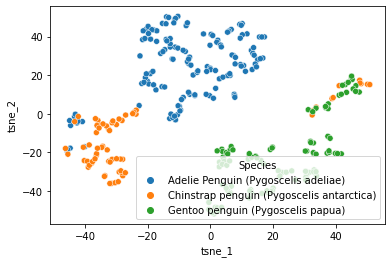

For perplexity = 5 and learning_rate =  100


c:\Users\gopl0\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


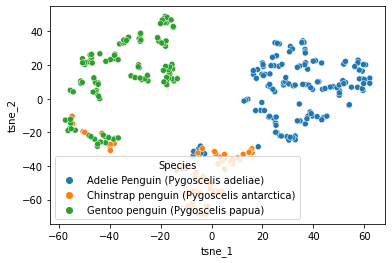

For perplexity = 5 and learning_rate =  1000


c:\Users\gopl0\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


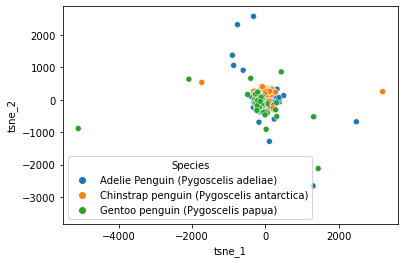

For perplexity = 50 and learning_rate =  10


c:\Users\gopl0\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


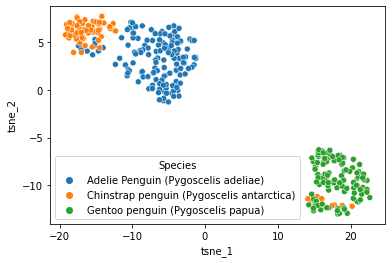

For perplexity = 50 and learning_rate =  100


c:\Users\gopl0\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


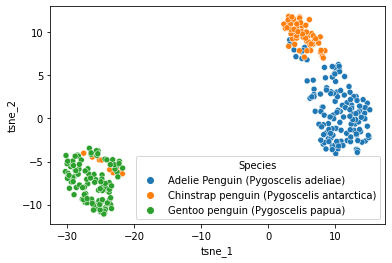

For perplexity = 50 and learning_rate =  1000


c:\Users\gopl0\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


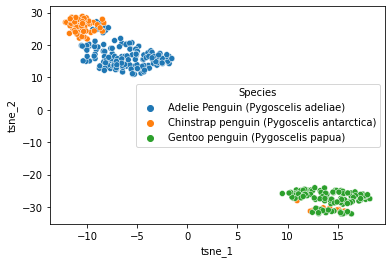

For perplexity = 500 and learning_rate =  10


ValueError: perplexity must be less than n_samples

In [34]:
for perplexity in range_perplexity:
    for learning_rate in range_learning_rate:
        print("For perplexity =", perplexity, "and learning_rate = ", learning_rate)
        tsne = TSNE(n_components=2, init='random', perplexity = perplexity, learning_rate = learning_rate, n_jobs = -1, random_state = 2022)
        
        pg_tsne = tsne.fit_transform(pg_cont_df)
        pg_tsne_df = pd.DataFrame(pg_tsne, columns = ["tsne_1", "tsne_2"])
        sns.scatterplot(pg_tsne_df["tsne_1"], pg_tsne_df["tsne_2"], hue=pg_df['Species'])
        plt.xlabel("tsne_1")
        plt.ylabel("tsne_2")
        plt.show()

# 綜合練習: 降維搭配分群

### K-means with PCA

### 降維

In [ ]:
pca = PCA(n_components=2) # 降為二維
pg_pca = pca.fit_transform(pg_cont_df)
pg_pca_df = pd.DataFrame(pg_pca, columns = ["PCA_1", "PCA_2"])

### 分群

In [ ]:
pca_kmeans = KMeans(n_clusters=3, random_state=0)
kmeans_label = pca_kmeans.fit_predict(pg_pca_df)

### 視覺化

In [ ]:
sns.scatterplot(pg_pca_df["PCA_1"], pg_pca_df["PCA_2"], hue=kmeans_label)
plt.xlabel("PCA_1")
plt.ylabel("PCA_2")
plt.show()

## (練習) DBSCAN with PCA

### 降維

In [ ]:
pca = PCA(n_components=2) # 降為二維
pg_pca = pca.fit_transform(pg_cont_df)
pg_pca_df = pd.DataFrame(pg_pca, columns = ["PCA_1", "PCA_2"])

### 分群

In [ ]:
pca_dbscan = DBSCAN(eps=1, min_samples=10)
label_pca_dbscan = pca_dbscan.fit_predict(pg_pca_df)

### 視覺化

In [ ]:
sns.scatterplot(pg_pca_df["PCA_1"], pg_pca_df["PCA_2"], hue=label_pca_dbscan)
plt.xlabel("PCA_1")
plt.ylabel("PCA_2")
plt.show()